# Aula 2 - Algorítimos Genéticos

Os Algoritmos Genéticos (AGs) são uma classe de algoritmos de otimização e busca que são inspirados pelo processo de evolução natural e seleção natural que ocorre na biologia. Eles foram desenvolvidos por John Holland na década de 1960 e têm sido aplicados com sucesso em uma ampla gama de problemas de otimização, modelagem e aprendizado de máquina. Neste texto, exploraremos os principais conceitos dos Algoritmos Genéticos, desde sua inspiração biológica até a implementação prática em Python, incluindo gráficos para visualizar o processo.

**1. Inspiração Biológica**

A inspiração para os Algoritmos Genéticos vem da biologia, especificamente do processo de evolução e seleção natural. Na natureza, as espécies evoluem ao longo do tempo devido às variações genéticas que ocorrem nas gerações sucessivas. Essas variações são aleatórias e resultam em uma diversidade genética dentro de uma população. A seleção natural atua como um mecanismo de filtragem, favorecendo as características que conferem uma vantagem de sobrevivência e reprodução. Com o tempo, as características vantajosas se tornam mais prevalentes na população, levando à adaptação da espécie ao seu ambiente.

**2. Fenótipos e Genótipos**

No contexto dos Algoritmos Genéticos, os fenótipos representam as soluções potenciais para o problema em questão. Por exemplo, em um problema de otimização, o fenótipo pode ser uma solução candidata, como um conjunto de parâmetros para uma função. Os genótipos, por outro lado, são representações internas das soluções. Eles podem ser codificados de várias maneiras, como sequências binárias, vetores numéricos ou estruturas mais complexas. Os genótipos são os indivíduos em uma população e podem sofrer variações genéticas durante a evolução.

**3. Passo a Passo em Python com Gráficos**

Aqui está um passo a passo simplificado de como implementar um Algoritmo Genético em Python, incluindo gráficos para visualizar o processo:

**Passo 1: Inicialização**

* Crie uma população inicial de genótipos aleatórios.
* Avalie o fitness de cada genótipo, ou seja, quão bem ele se sai na resolução do problema.

**Passo 2: Seleção**

* Selecione genótipos com base em sua aptidão (fitness). Genótipos com maior fitness têm maior probabilidade de serem selecionados.
* Reproduza os genótipos selecionados, criando uma nova geração de genótipos.

**Passo 3: Cruzamento (Crossover)**

* Combine os genótipos dos pais para criar descendentes (filhos). Isso simula o processo de recombinação genética.
* Aplique uma taxa de crossover para determinar a probabilidade de cruzamento.

**Passo 4: Mutação**

* Introduza pequenas alterações aleatórias nos genótipos dos descendentes. Isso ajuda a manter a diversidade genética.
* Aplique uma taxa de mutação para determinar a probabilidade de mutação.

**Passo 5: Avaliação e Convergência**

* Avalie o fitness dos descendentes.
* Substitua a geração atual pela nova geração de genótipos.
* Repita os passos 2 a 4 por um número especificado de gerações ou até que uma condição de parada seja atendida.

**Passo 6: Visualização dos Resultados**

* Durante o processo, registre o fitness médio e o fitness máximo em cada geração.
* Plote um gráfico para acompanhar a convergência do algoritmo ao longo das gerações.
* Apresente o(s) melhor(es) genótipo(s) encontrado(s) e sua avaliação (fitness).

# Exercício - Aula 2 – Algoritmos Genéticos

Considere a função de duas variáveis reais $x$ e $y$ definidas por:

$$f(x, y) = (x^2 + y - 11)^2 + (x + y^2 - 7)^2$$

(Função de Himmelblau) com $-5 \leq x, y \leq 5$.

Implemente um algoritmo genético para buscar valores de $x$ e $y$ que minimizam a função $f$.

Em sua resolução deverá constar:
- A codificação de um indivíduo em termos de seu genótipo e fenótipo;
- A função de fitness utilizada;
- Apresente os parâmetros (tamanho da população, taxa de mutação, quantidade de gerações) utilizados para executar o algoritmo;
- Inclua um gráfico mostrando a variação do fitness médio e fitness máximo ao longo das gerações;
- Apresente o(s) indivíduo(s) com maior fitness ao final das gerações, indicando também que valor a função assume nesse(s) pontos;
- Compare os resultados por você obtidos com os mínimos conhecidos (pesquise por Função de Himmelblau para verificar quais são).


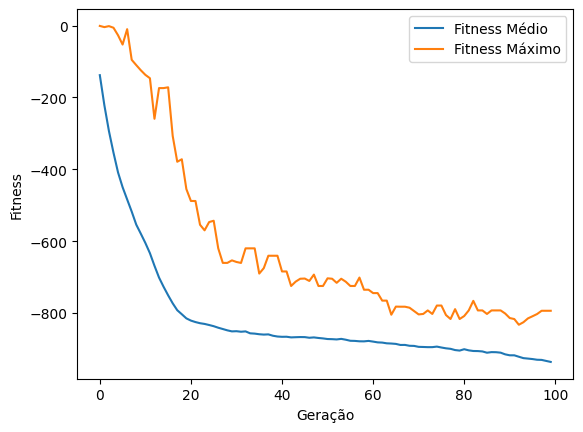

Melhor indivíduo: (-3.898596449879993, -3.2654922517198735)
Melhor fitness: -0.9268367812019598
Valor da função no melhor ponto: 0.9268367812019598
Mínimos conhecidos: [(3.0, 2.0), (-2.805118, 3.131312), (-3.77931, -3.283186), (3.584428, -1.848126)]


In [3]:
import random
import matplotlib.pyplot as plt

# Função de Himmelblau
def himmelblau(x, y):
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

# Parâmetros do algoritmo genético
population_size = 1000
mutation_rate = 0.01
num_generations = 100

# Intervalo para os valores de x e y
x_range = (-5, 5)
y_range = (-5, 5)

# Inicialização da população
population = [(random.uniform(x_range[0], x_range[1]), random.uniform(y_range[0], y_range[1])) for _ in range(population_size)]

# Codificação: genótipo é um par (x, y)

# Função de fitness
def fitness(individual):
    return -himmelblau(individual[0], individual[1])  # Queremos minimizar a função

# Evolução da população
average_fitness_values = []
max_fitness_values = []
best_individual = None
best_fitness = float('-inf')

for generation in range(num_generations):
    fitness_values = [fitness(individual) for individual in population]

    average_fitness = sum(fitness_values) / population_size
    max_fitness = max(fitness_values)

    average_fitness_values.append(average_fitness)
    max_fitness_values.append(max_fitness)

    if max_fitness > best_fitness:
        best_individual = population[fitness_values.index(max_fitness)]
        best_fitness = max_fitness

    selected_parents = random.choices(population, weights=[f / sum(fitness_values) for f in fitness_values], k=population_size)

    new_population = []

    for _ in range(population_size):
        parent1, parent2 = random.sample(selected_parents, 2)
        child = (
            parent1[0] if random.random() < 0.5 else parent2[0],
            parent1[1] if random.random() < 0.5 else parent2[1]
        )

        if random.random() < mutation_rate:
            child = (
                child[0] + random.uniform(-0.1, 0.1),
                child[1] + random.uniform(-0.1, 0.1)
            )

        new_population.append(child)

    population = new_population

# Plot dos resultados
plt.plot(average_fitness_values, label='Fitness Médio')
plt.plot(max_fitness_values, label='Fitness Máximo')
plt.xlabel('Geração')
plt.ylabel('Fitness')
plt.legend()
plt.show()

# Resultados finais
print("Melhor indivíduo:", best_individual)
print("Melhor fitness:", best_fitness)
print("Valor da função no melhor ponto:", himmelblau(best_individual[0], best_individual[1]))

# Mínimos conhecidos da Função de Himmelblau
known_minima = [(3.0, 2.0), (-2.805118, 3.131312), (-3.779310, -3.283186), (3.584428, -1.848126)]
print("Mínimos conhecidos:", known_minima)
